In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [2]:
# Swimmer-v2：|obs|= 8 |act|=2
log_dir = r"C:\Users\pc-admin\Github Repos\spinup_data\2019-05-10_elu_ddpg2_Swimmer_v2_logdet_invCov\2019-05-10_10-01-53-elu_ddpg2_Swimmer_v2_logdet_invCov_s3"
log_dir = r"C:\Users\pc-admin\Github Repos\spinup_data\2019-05-11_elu_ddpg_Swimmer_v2_logdet_invCov\2019-05-11_16-06-12-elu_ddpg_Swimmer_v2_logdet_invCov_s3"
log_dir = r"C:\Users\pc-admin\Github Repos\spinup_data\2019-05-09_elu_ddpg2_Swimmer_v2_2piLoss\2019-05-09_22-57-41-elu_ddpg2_Swimmer_v2_2piLoss_s3"
log_dir = r"C:\Users\pc-admin\Github Repos\spinup_data\2019-05-09_elu_ddpg2_Swimmer_v2\2019-05-09_15-49-24-elu_ddpg2_Swimmer_v2_s3"
# Reacher-v2：|obs|=11 |act|=2
# log_dir = r"C:\Users\pc-admin\Github Repos\spinup_data\2019-05-11_ddpg_Reacher_v2_logdet_invCov\2019-05-11_13-18-08-ddpg_Reacher_v2_logdet_invCov_s3"

prog_log_path = "{}\progress.txt".format(log_dir)
prog_df = pd.read_csv(prog_log_path,  sep='\t')

exp_log_path = "{}\experiences_log.txt".format(log_dir)
experiences_df = pd.read_csv(exp_log_path,  sep='\t')

In [3]:
def plot_progress_log_data(prog_df, title=[''], row=1, col=5, figwidth=18, figheight=18):
    """Plot epoch log data"""
    f, axes = plt.subplots(row, col)
    f.set_figwidth(figwidth)
    f.set_figheight(figheight)
    
    for d_i in range(len(title)):
        axes.flat[d_i].plot(np.arange(len(prog_df['Epoch'])), prog_df[title[d_i]])
        axes.flat[d_i].set_title('{}'.format(title[d_i]))
        axes.flat[d_i].set_xlabel('Epoch')
    
    # Invisualize empty axis
    if len(title) < row*col:
        for a_emp in range(len(title), row*col):
            axes.flat[a_emp].axis('off')

    plt.tight_layout()
    
def plot_experience_summary(data, title, row, col, markersize = 0.015):
    """Plot reward, uncertainty, rnd_act_error, and rnd_cri_error"""
    f, axes = plt.subplots(row, col)
    f.set_figwidth(18)
    f.set_figheight(3)
    
    for d_i in range(len(data)):
        axes.flat[d_i].plot(np.arange(data[d_i].shape[0]), data[d_i], '.',markersize=markersize)
        axes.flat[d_i].set_title('{}'.format(title[d_i]))
        axes.flat[d_i].tick_params(axis='x', which='both', bottom=False,top=False,labelbottom=False)
    
    # Invisualize empty axis
    if len(data) < row*col:
        for a_emp in range(len(data), row*col):
            axes.flat[a_emp].axis('off')
    
def plot_explerience(data, row, col, markersize=0.15, figtitle='obs', figname='experience_ob.jpg', 
                     figwidth=18, figheight=18,sharey=False):
    """Plot experience log data"""
    f, axes = plt.subplots(row,col,sharey=sharey)
    f.set_figwidth(figwidth)
    f.set_figheight(figheight)
    for d_i in range(data.shape[1]):
        axes.flat[d_i].plot(np.arange(data.shape[0]), data[:,d_i], '.',markersize=markersize)
        axes.flat[d_i].set_title('{}_{}'.format(figtitle, d_i))
        axes.flat[d_i].tick_params(axis='x', which='both', bottom=False,top=False,labelbottom=False)
    
    # Invisualize empty axis
    for a_emp in range(data.shape[1], row*col):
        axes.flat[a_emp].axis('off')
    
    plt.tight_layout()
    plt.savefig(figname, dpi=300)


## Epoch Log

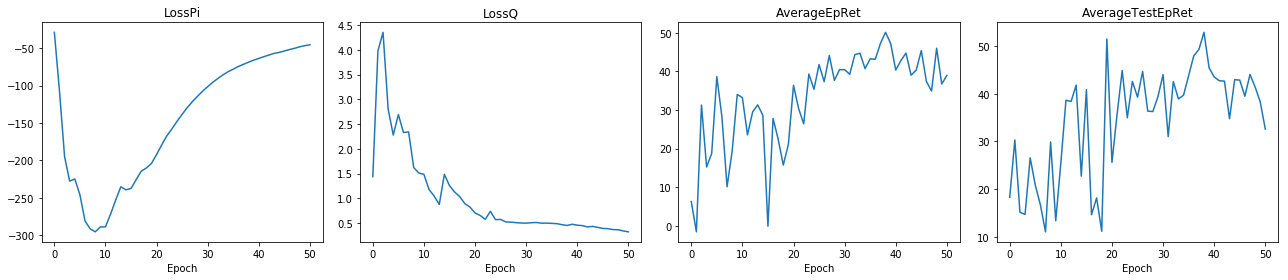

In [4]:
title=['LossPi','LossQ','AverageEpRet','AverageTestEpRet']
plot_progress_log_data(prog_df, title, row=1, col=4, figwidth=18, figheight=4)

In [5]:
experiences_df.columns

Index(['Epoch', 'Step', 'o_0', 'o_1', 'o_2', 'o_3', 'o_4', 'o_5', 'o_6', 'o_7',
       'a_0', 'a_1', 'a_mu_0', 'a_mu_1', 'a_alpha_0', 'a_alpha_1', 'a_beta_0',
       'r', 'o2_0', 'o2_1', 'o2_2', 'o2_3', 'o2_4', 'o2_5', 'o2_6', 'o2_7',
       'd', 'Time'],
      dtype='object')

## Obs

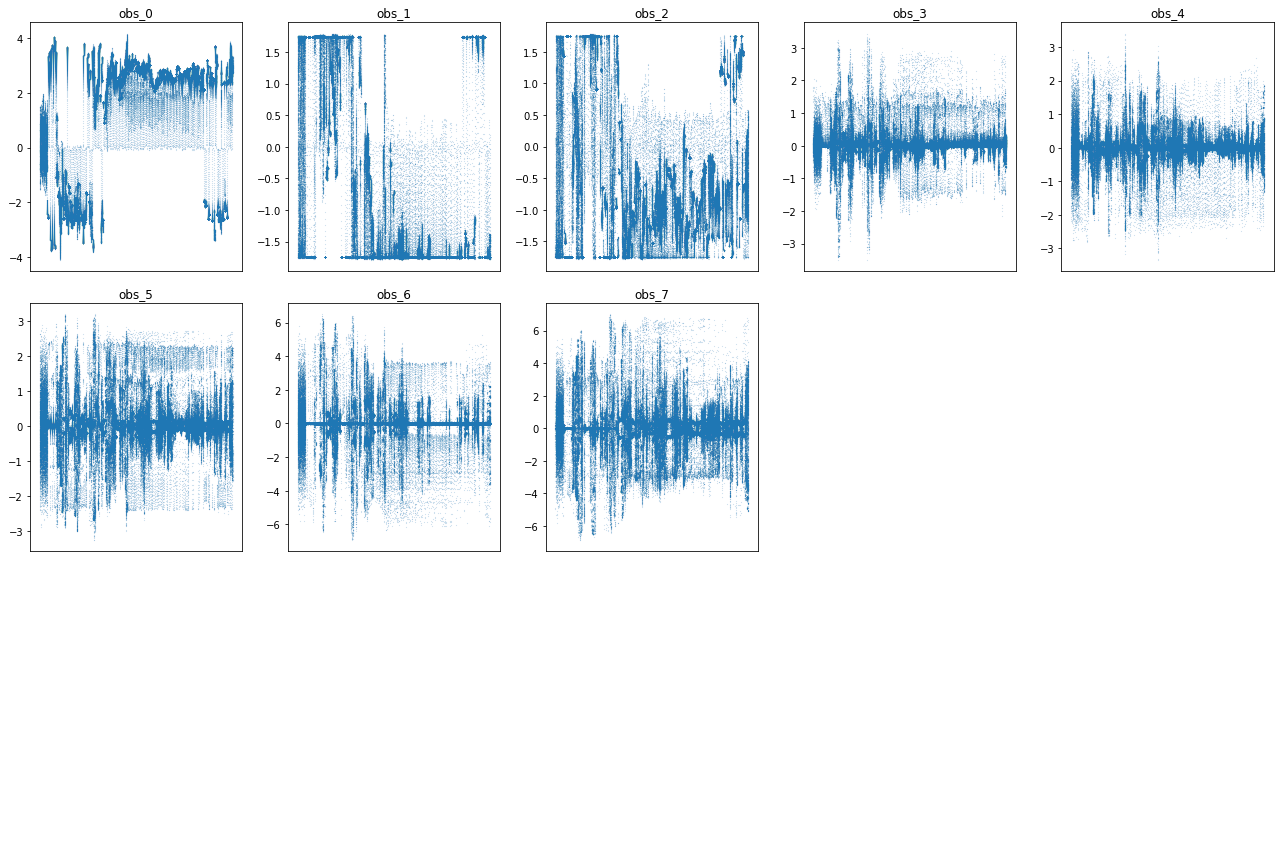

In [6]:
obs_dim = 8
# obs_dim = 11
exp_obs = experiences_df[['o_{}'.format(i) for i in range(obs_dim)]].values
plot_explerience(exp_obs, 3, 5, markersize=0.15, figtitle='obs', figname='experience_obs.jpg', 
                 figwidth=18, figheight=12)


## act

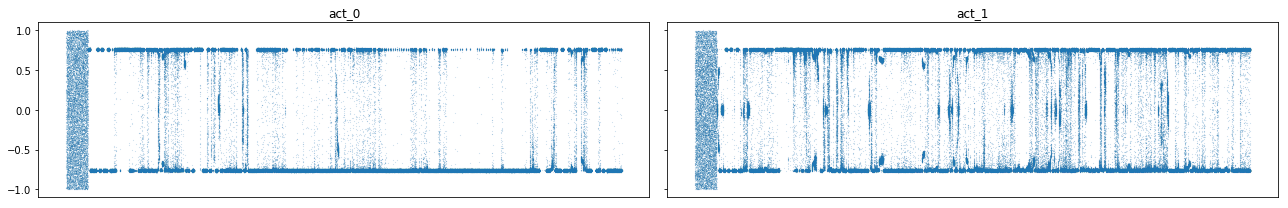

In [7]:
act_dim = 2
exp_act = experiences_df[['a_{}'.format(i) for i in range(act_dim)]].values
plot_explerience(exp_act, 1, 2, markersize=0.15, figtitle='act', figname='experience_act.jpg', 
                 figwidth=18, figheight=3, sharey=True)

## a_mu

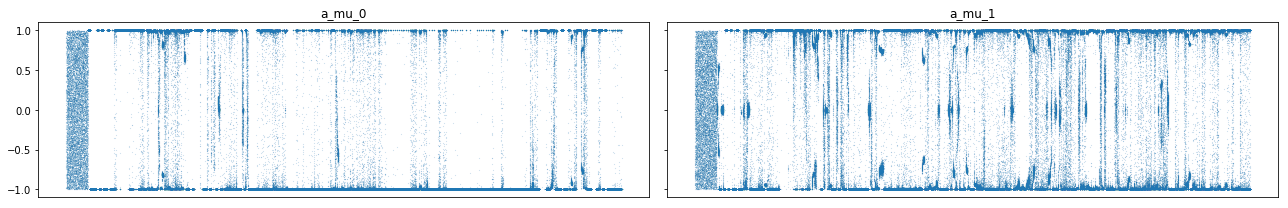

In [8]:
exp_mu = experiences_df[['a_mu_{}'.format(unc_j) for unc_j in range(act_dim)]].values
plot_explerience(exp_mu, 1, act_dim, markersize=0.15, figtitle='a_mu', figname='experience_a_mu.jpg', 
                 figwidth=18, figheight=3, sharey=True)

## a_sigma

In [9]:
experiences_df.columns

Index(['Epoch', 'Step', 'o_0', 'o_1', 'o_2', 'o_3', 'o_4', 'o_5', 'o_6', 'o_7',
       'a_0', 'a_1', 'a_mu_0', 'a_mu_1', 'a_alpha_0', 'a_alpha_1', 'a_beta_0',
       'r', 'o2_0', 'o2_1', 'o2_2', 'o2_3', 'o2_4', 'o2_5', 'o2_6', 'o2_7',
       'd', 'Time'],
      dtype='object')

In [10]:
 experiences_df[['a_alpha_{}'.format(unc_j) for unc_j in range(act_dim)]][10000:12000]

,a_alpha_0,a_alpha_1
10000,0.000000,0.000000
10001,-7.390486,-7.596503
10002,-7.999975,-7.999949
10003,-7.999999,-7.999997
10004,-8.000000,-8.000000
10005,-8.000000,-8.000000
10006,-8.000000,-8.000000
10007,-8.000000,-8.000000
10008,-8.000000,-8.000000
10009,-8.000000,-8.000000


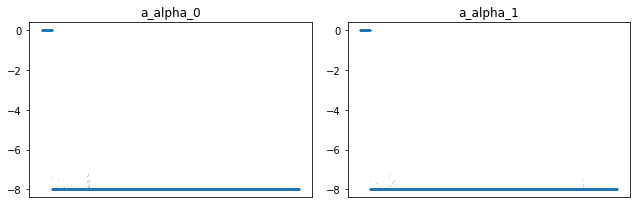

In [11]:
exp_sigma = experiences_df[['a_alpha_{}'.format(unc_j) for unc_j in range(act_dim)]].values
plot_explerience(exp_sigma, 1, act_dim, markersize=0.25, figtitle='a_alpha', figname='experience_a_mu.jpg', 
                 figwidth=9, figheight=3, sharey=False)

In [12]:
# experiences_df[['a_beta_{}'.format(unc_j) for unc_j in range(act_dim)]]

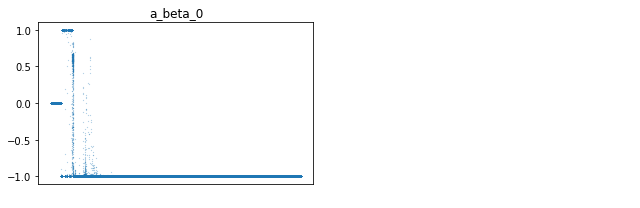

In [13]:
exp_sigma = experiences_df[['a_beta_{}'.format(unc_j) for unc_j in range(int(act_dim*(act_dim-1)/2))]].values
plot_explerience(exp_sigma, 1, act_dim, markersize=0.25, figtitle='a_beta', figname='experience_a_beta.jpg', 
                 figwidth=9, figheight=3, sharey=False)